In [1]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 
#matplotlib inline
from math import pi
pd.options.mode.chained_assignment = None

In [2]:
#data file
df = pd.read_csv("resources/Austin_Animal_Center_Outcomes.csv", encoding='latin-1')
print(df.shape)
df.head()

(76048, 12)


,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_upon_Outcome,Age_upon_Outcome,Breed,Color
0,A006100,Scamp,3/8/14 17:10,14-Mar,7/9/07,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White
1,A006100,Scamp,12/20/14 16:35,14-Dec,7/9/07,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White
2,A006100,Scamp,12/7/17 0:00,17-Dec,7/9/07,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White
3,A047759,Oreo,4/7/14 15:12,14-Apr,4/2/04,Transfer,Partner,Dog,Neutered Male,10 years,Dachshund,Tricolor
4,A134067,Bandit,11/16/13 11:54,13-Nov,10/16/97,Return to Owner,NaN,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White


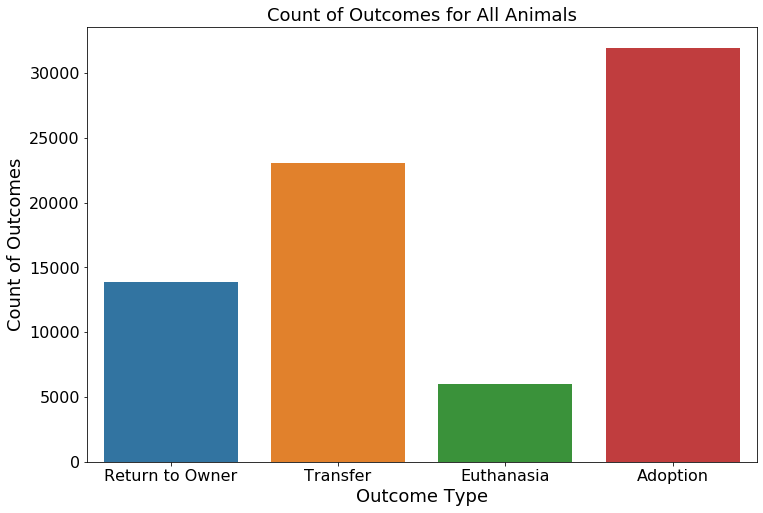

In [3]:
#define count of outcome types for all animals
df['Outcome_Type'] = pd.Categorical(df['Outcome_Type'], ordered=False,
                                      categories=['Return to Owner', 'Transfer', 'Euthanasia', 'Adoption'])
plt.figure(figsize=(12, 8))
sns.countplot(x='Outcome_Type', data=df, orient='v')
plt.title('Count of Outcomes for All Animals', fontsize=18)
plt.xlabel('Outcome Type', fontsize=18)
plt.ylabel('Count of Outcomes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('number_of_animal_outcome_types.png');

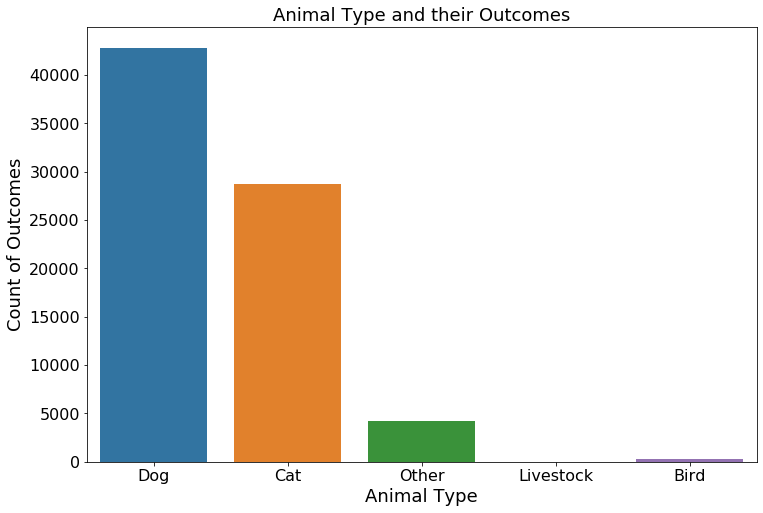

In [4]:
#define count of animal types at outcome

plt.figure(figsize=(12, 8))
sns.countplot(x='Animal_Type', data=df, orient='v')
plt.title('Animal Type and their Outcomes', fontsize=18)
plt.xlabel('Animal Type', fontsize=18)
plt.ylabel('Count of Outcomes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('outcomes_by_all_animal_types.png');

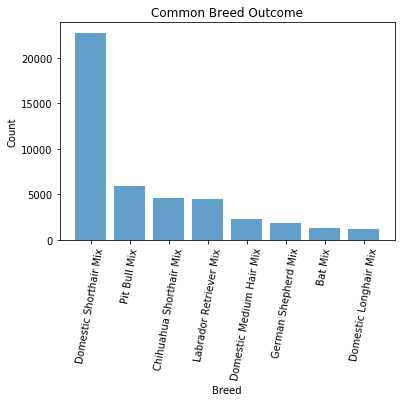

In [5]:
#Dog Breeds at outcome
breed_outcome = pd.DataFrame(df["Breed"].value_counts()).reset_index()
breed_column = breed_outcome.rename(columns = {"index":"Breed","Breed":"Count"})
breed_column.head()
x_axis = breed_column["Breed"][0:8]
y_axis = breed_column["Count"][0:8]
#Dog Breeds at outcome chart
plt.bar(x_axis, y_axis,alpha=0.7,align="center")
plt.title("Common Breed Outcome")
plt.ylabel("Count")
plt.xlabel("Breed")
plt.xticks(rotation=80)
plt.savefig("common_breed_outcome.png")

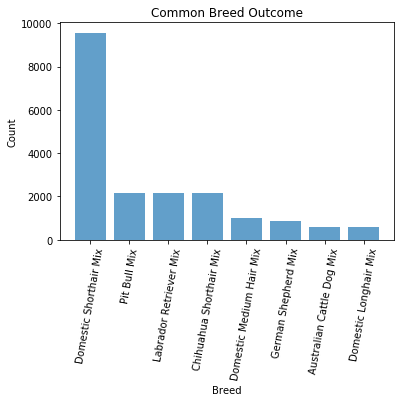

In [6]:
#Dog Breeds with adopted outcome

rslt_df = df.loc[df['Outcome_Type'] == "Adoption"]
#Most Common Adopted Breeds
breed_outcome = pd.DataFrame(rslt_df["Breed"].value_counts()).reset_index()
breed_column = breed_outcome.rename(columns = {"index":"Breed","Breed":"Count"})
breed_column.head()
x_axis = breed_column["Breed"][0:8]
y_axis = breed_column["Count"][0:8]
#Which breeds are commonly adopoted
plt.bar(x_axis, y_axis,alpha=0.7,align="center")
plt.title("Common Breed Outcome")
plt.ylabel("Count")
plt.xlabel("Breed")
plt.xticks(rotation=80)
plt.savefig("common_breed_outcome.png")


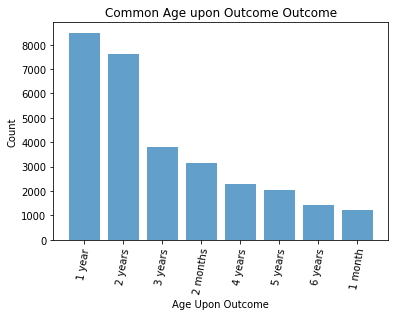

In [7]:
#Age of dogs at time of outcome
rslt_df = df.loc[df['Animal_Type'] == "Dog"]
#Most Common Adopted Breeds by Age
breed_outcome = pd.DataFrame(rslt_df["Age_upon_Outcome"].value_counts()).reset_index()
breed_column = breed_outcome.rename(columns = {"index":"Age_upon_Outcome","Age_upon_Outcome":"Count"})
breed_column.head()
x_axis = breed_column["Age_upon_Outcome"][0:8]
y_axis = breed_column["Count"][0:8]
#Which breeds are commonly adopoted and their age
plt.bar(x_axis, y_axis,alpha=0.7,align="center")
plt.title("Common Age upon Outcome Outcome")
plt.ylabel("Count")
plt.xlabel("Age Upon Outcome")
plt.xticks(rotation=80)
plt.savefig("common_breed_age_outcome.png")